In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from scipy.misc import derivative
from pathlib import Path

%matplotlib inline

In [3]:
class scan:
    
    normalization = 1
    calibration = 1
    
    def __init__(self, spectra, position_from_center):
        self.spectra = spectra
        self.beam_position = position_from_center
        
    def quick_plot(self):
        spec_data = self.spectra
        x_dat = list(range(len(spec_data)))
        fig, ax = plt.subplots()
        ax.plot(x_dat, spec_data, linewidth=2.0)
        plt.show()
        
    def quick_plot_d(self):
        spec_data = self.spectra
        spec_data_d1 = []
        x_data = list(range(len(spec_data)))
        for z in range((len(spec_data) - 1)):
            d_at_i = (spec_data[z] - spec_data[z+1]) / 2
            spec_data_d1.append(d_at_i)
        x_data_d1 = list(range(len(spec_data_d1)))
        fig, ax = plt.subplots()
        ax.set_xlim = (250, 750)
        #ax.set_ylim = (-250, 250)
        ax.plot(x_data_d1, spec_data_d1, linewidth = 2.0)
        plt.show()        
    
        
    # def plot(self, llim, ulim):
    #     spec_data = self.spectra
    #     x_dat = range(len(spec_data))
    #     fig, ax = plt.subplots()
    #     plt.xlim = (llim, ulim)
    #     ax.plot(x_dat, spec_data, linewidth=2.0)
    #     plt.show()
    
    def plot(self,llim, ulim):
        spec_data = self.spectra
        x_dat = range(len(spec_data))
        fig, ax = plt.subplots()
        ax.set_xlim(llim,ulim)
        ax.set_xlabel('Bin')
        ax.set_ylabel('Intensity')
        # ax.set_title(str(self.
        ax.plot(x_dat, spec_data, linewidth=2.0)
        plt.show()
        #return (fig, ax)


    def stackplot_d(self):
        spec_data = self.spectra
        x_data = range(len(spec_data))
        #spec_data_d = derivative(spec_data, x_data)
        fig, ax = plt.subplots(1,2)
        #ax.set_xlim(llim,ulim)
        #ax.plot(x_data, spec_data_d, linewidth=2.0)
        plt.show()
        return spec_data_d

In [4]:
cal_i = 3
cal_scan = (scan(df['Spectra'][cal_i],df['Position'][cal_i]))
cal_scan.plot(None, None)
#cal_scan.quick_plot()

#scan_list = []
#scan_list.append(cal_scan)
#Mo_W_Foil = sample('Mo + W Foil for Calibration', scan_list)

#cal_scan.plot(800, 1200)
#print(cal_scan.quick_plot_d)



NameError: name 'df' is not defined

TypeError: can only concatenate list (not "float") to list

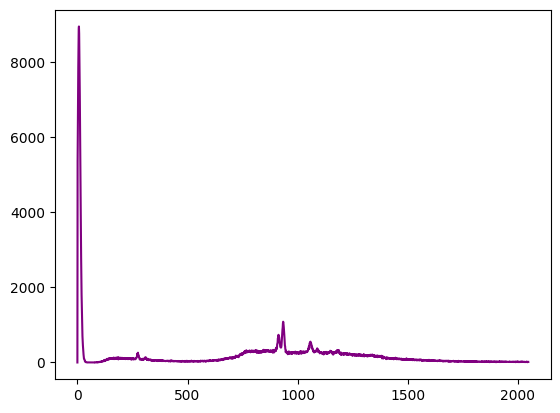

In [148]:

# defining the function
def function(x):
    return (df['Spectra'][3])
  
# calculating its derivative
def deriv(x):
    return derivative(function, x)
  
# defininf x-axis intervals
y = list(range(len(df['Spectra'][3])))

  
# plotting the function
plt.plot(y, function(y), color='purple', label='Function')
  
# plotting its derivative
plt.plot(y, deriv(y), color='green', label='Derivative')
  
# formatting
plt.legend(loc='upper left')
plt.grid(True)

In [37]:
class sample:
    
    recipe_pH = None
    recipe_steel = None
    
#    def __init__(self, full_name, pH, steel_fiber, scan_list, file_location):
    
    
    def __init__(self, full_name, scan_list):
        return
    
    def quick_plot(self):
        return
    
    def quick_stack(self):
        return
        
    def plot(self):
        return
    
    def stackplot(self):
        return
    
    def plot_d(self):
        return
    
    def stackplot_d(self):
        return

In [28]:
class series:
    def __init__(self, sample_list):
        return

In [3]:
def generate_dataframe(folder_dir, meta_dic):
    
    #initialize a df of the CSV sample/scan info.
    #This should probably be something I iron out with path (it'd be a '\' on PC) but it's fine for now
    raw_df = pd.read_csv(folder_dir + "/" + meta_dic)
    
    #get the hdf filename for every file in the directory
    files = []
    for x in os.listdir(folder_dir):
        if x.endswith(".hdf5"):
            files.append(x)
    
    #Add a column for filename in meta_df that is the same length of the meta_df
    edxname = [''] * len(raw_df.index)
    raw_df['FileName'] = edxname
    
    #Find each file in the meta_df by comparing scan number. Add file name 
    for y in range(len(files)):
        hdf_file = h5py.File(directory + files[y], 'r')
        for z in range(len(raw_df.index)):
            if raw_df['ScanNum'].values[z] == hdf_file.attrs['Scan Number']:
                raw_df['FileName'].values[z] = directory+files[y]
    
    #Add a column for EDX data arrays
    edxd = [''] * len(raw_df.index)
    raw_df['Spectra'] = edxd
    raw_df['Position'] = edxd
    
    #Scan through filenames and add position and spectra data arrays to df
    #If there's none, set those values equal to some string or warning
    for h in range(len(raw_df.index)):
        datahdf = h5py.File(raw_df['FileName'].values[h], 'r')
        positionflag = 'No Position Data (uh oh)'
        spectraflag = 'No Spectra Data (uh oh)'
        with h5py.File(raw_df['FileName'].values[h], 'r') as f:
            for x in range(len(f.keys())):
                if list(f.keys())[x] == '7bmb1:aero:m2.VAL':
                    raw_df['Position'].values[h] = f['7bmb1:aero:m2.VAL'][...]
                    positionflag = 'yep'
                if list(f.keys())[x] == 'dxpMercury:mca1.VAL':
                    raw_df['Spectra'].values[h] = f['dxpMercury:mca1.VAL'][...]
                    spectraflag = 'yep'
        if positionflag != 'yep':
            raw_df['Position'].values[h] = []
        if spectraflag != 'yep':
            raw_df['Spectra'].values[h] = []

    return raw_df

In [30]:
def df_to_objects(data_df):
    df_length = len(data_df.index)
    sample_array = []
    
    for a in range(df_length):
        sample_pH = None
        sample_steel = None
        sample_name = None
        sample_scans = []
        sample_file = None
        
#         if data_df['pH'][a] == 1:
#             sample_pH = 'High'
#         elif data_df['pH'][a] == 0:
#             sample_pH = 'Low'
            
#         if data_df['SteelFiber'][a] == 1:
#             sample_steel = 'Steel Fiber'
#         elif data_df['SteelFiber'][a] == 0:
#             sample_steel = 'No Steel Fiber'
            
        sample_name = data_df['FullName'][a]
        sample_file = data_df['FileName'][a]
        
        sample_scans.append(data_df['Position'][a])
        
        sample_array.append(sample(sample_name, sample_scans, sample_file))

    return sample_array

In [32]:
x = df_to_objects(df)
x[0]

In [2]:
class spatialspectra:
    
    def __init__(self, sname, ph, days, temperature, scan_set):
        pass
    
class scan:
    
    def __init__(self, spectra):
        pass
    
class spectra:
    
    def __init__(self, name, ydata, ):
        self.name = name
        self.fileloc = fileloc
        self.ftype = ftype
        
    def see(self, index):
        if self.ftype == 'hdf5':
            print('yep')
            openedh5df = h5py.File(os.path.expanduser(self.fileloc), 'r')
            with openedh5df as f:
                spec_dat = f['dxpMercury:mca1.VAL'][index]
                x_dat = range(len(spec_dat))
            fig, ax = plt.subplots()
            ax.plot(x_dat, spec_dat, linewidth=2.0)
            plt.show()
            
        else: 
            print('Data file not supported')
    
    def plot(self, position, llim, ulim):
        if self.ftype == 'hdf5':
            print('yep')
            x_dat = 0
            y_dat = 0
        else: 
            print('Data file not supported')
    

In [4]:
#Make a dataframe from the sample directory. Good to visualize data. You should 
#feed this dataframe to another function that will make an array of objects

def gen_spec_df(folder_dir, meta_dic):
    
    #initialize a df of the CSV sample/scan info.
    #This should probably be something I iron out with path (it'd be a '\' on PC) but it's fine for now
    raw_df = pd.read_csv(folder_dir + "/" + meta_dic)
    
    #get the hdf filename for every file in the directory
    files = []
    for x in os.listdir(folder_dir):
        if x.endswith(".hdf5"):
            files.append(x)
    
    #Add a column for filename in meta_df that is the same length of the meta_df
    edxname = [''] * len(raw_df.index)
    raw_df['FileName'] = edxname
    
    #Find each file in the meta_df by comparing scan number. Add file name 
    for y in range(len(files)):
        hdf_file = h5py.File(directory + files[y], 'r')
        for z in range(len(raw_df.index)):
            if raw_df['ScanNum'].values[z] == hdf_file.attrs['Scan Number']:
                raw_df['FileName'].values[z] = directory+files[y]
    
    #Add a column for EDX data arrays
    edxd = [''] * len(raw_df.index)
    raw_df['Spectra'] = edxd
    raw_df['Position'] = edxd
    
    #Scan through filenames and add position and spectra data arrays to df
    #If there's none, set those values equal to some string or warning
    for h in range(len(raw_df.index)):
        datahdf = h5py.File(raw_df['FileName'].values[h], 'r')
        positionflag = 'No Position Data (uh oh)'
        spectraflag = 'No Spectra Data (uh oh)'
        with h5py.File(raw_df['FileName'].values[h], 'r') as f:
            for x in range(len(f.keys())):
                if list(f.keys())[x] == '7bmb1:aero:m2.VAL':
                    raw_df['Position'].values[h] = f['7bmb1:aero:m2.VAL'][...]
                    positionflag = 'yep'
                if list(f.keys())[x] == 'dxpMercury:mca1.VAL':
                    raw_df['Spectra'].values[h] = f['dxpMercury:mca1.VAL'][...]
                    spectraflag = 'yep'
        if positionflag != 'yep':
            raw_df['Position'].values[h] = []
        if spectraflag != 'yep':
            raw_df['Spectra'].values[h] = []

    return raw_df

In [22]:
#Make and return a single sample's spatial spectrum with it's associated scans at different distances

def make_object(df, scannum, position):
    flag = 'Not in Range'
    # if position == None:
    #     for x in range(len(df.index)):
    #         if df['ScanNum'].values[x] == scannum:
    #             if len(df['Position'].values[x]) > 0:

            
    for x in range(len(df.index)):
            if df['ScanNum'].values[x] == scannum:
                if len(df['Spectra'].values[x]) > 0:
                    if len(df['Position'].values[x]) > 0:
                        scindex = df[df['ScanNum']==scannum].index.values[0]
                        posarr = df['Position'].values[scindex]
                        specarr = df['Spectra'].values[scindex]
                        print(posarr)
                        print('\n')
                        print(specarr)
                        return  #scanobj = scan(df.query('ScanNum' == str(scannum))['Spectra'])

                    else: print('No Position Data, setting position as 0 for all scans')
                else: return (print('No Spectra Data'))
                flag = None
    if flag != None:
        print(flag)
        
class scan:
    
    def __init__(self, specdata, pos):
        pass
    



#def spectralize(df):
#obj = spectra('Tester', '~/Documents/MDA_Scans_Seidler/7bmb1_1080.hdf5' )
#obj.see(2)

In [7]:
directory = '/Users/anthonygironda/Documents/MDA_Scans_Seidler/'
meta = '7bmb1_10.19.22_EDXindex.csv'

df = gen_spec_df(directory, meta)

y = (df[df['ScanNum']==1083].index.values)[0]

df

#make_object(df, 1086, 0)

,ScanNum,FullName,pH,Days,Temperature,Atmosphere,SteelFiber,Aborted,Notes,Start (mm),End (mm),Step Size (mm),Slit Entrance (um),Scan Time,Rotation Speed (deg/s),FileName,Spectra,Position
0,1066,Foil Scan 1,NaN,NaN,NaN,NaN,NaN,0,EDX Commisioning,NaN,NaN,NaN,NaN,NaN,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[[0.0, 221.0, 295.0, 314.0, 334.0, 354.0, 354....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,1067,Foil Scan 2,NaN,NaN,NaN,NaN,NaN,0,EDX Commisioning,NaN,NaN,NaN,NaN,NaN,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[[0.0, 203.0, 278.0, 317.0, 330.0, 369.0, 349....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,1068,Foil Scan 3,NaN,NaN,NaN,NaN,NaN,0,EDX Commisioning,NaN,NaN,NaN,NaN,NaN,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[[0.0, 849.0, 945.0, 1174.0, 1282.0, 1385.0, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,1069,Mo W Energy Calibration,NaN,NaN,NaN,NaN,NaN,0,EDX Calibration,NaN,NaN,NaN,NaN,90.0,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[0.0, 5366.0, 6316.0, 7253.0, 7844.0, 8473.0, ...",[]
4,1070,LaB6,NaN,NaN,NaN,NaN,NaN,0,EDX Commisioning,NaN,NaN,NaN,NaN,90.0,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[0.0, 5138.0, 6247.0, 7093.0, 7730.0, 8211.0, ...",[]
5,1071,Calcite (CaCO3),NaN,NaN,NaN,NaN,NaN,0,EDX Calibration,NaN,NaN,NaN,NaN,90.0,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[0.0, 5150.0, 6166.0, 7062.0, 7600.0, 8218.0, ...",[]
6,1072,High pH SF 25C 14d,1.0,14.0,25.0,100% CO2,1.0,0,Commisioning,13.0,6.0,1.00,250.0,20.0,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[0.0, 1054.0, 1230.0, 1444.0, 1533.0, 1597.0, ...",[]
7,1073,High pH SF 25C 14d,1.0,14.0,25.0,100% CO2,1.0,0,Commisioning,13.0,6.0,1.00,250.0,20.0,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[[0.0, 106.0, 120.0, 128.0, 174.0, 164.0, 185....","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
8,1074,High pH SF 25C 14d,1.0,14.0,25.0,100% CO2,1.0,0,Commisioning,13.0,6.0,1.00,250.0,20.0,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[[0.0, 98.0, 110.0, 135.0, 170.0, 159.0, 162.0...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9,1075,High pH SF 25C 14d,1.0,14.0,25.0,100% CO2,1.0,0,Commisioning,13.0,6.0,1.00,250.0,20.0,NaN,/Users/anthonygironda/Documents/MDA_Scans_Seid...,"[0.0, 6217.0, 7384.0, 8390.0, 9519.0, 9998.0, ...",[]


In [15]:
        with h5py.File(raw_df['FileName'].values[h], 'r') as g:
            colhead2 = list(g.keys())         
            for crawler in range(len(colhead2)):
                print(g['7bmb1:aero:m2.VAL'][...])
                if colhead2[crawler] == '7bmb1:aero:m2.VAL':
                    raw_df['Position'].values[h] = g['7bmb1:aero:m2.VAL'][...]
                else:
                    raw_df['Position'].values[h] = 'Look Elsewhere (uh oh)'

NameError: name 'raw_df' is not defined

In [16]:
fname = '/Users/anthonygironda/Documents/MDA_Scans_Seidler/7bmb1_1082.hdf5'
with h5py.File(fname, 'r') as f:
    data_spectra = f['dxpMercury:mca1.VAL'][...]
    #b = list(f.keys())
    #print(b[1])

fname = '/Users/anthonygironda/Documents/MDA_Scans_Seidler/7bmb1_1084.hdf5'  
with h5py.File(fname, 'r') as f:
    data_position = f['7bmb1:aero:m2.VAL'][...]
    
data_position

array([-13.  , -12.75,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,   0.  ,
         0.  ,   0.  ,   0.  ,   0.  ,   0.  ])

In [17]:
def hdf_dataframe(folder_dir, meta_dic):
    
    #initialize a df of the CSV sample/scan info. 
    meta_df = pd.read_csv(folder_dir + "/" + meta_dic)
    
    #get the hdf filename for every file in the directory
    files = []
    for x in os.listdir(directory):
        if x.endswith(".hdf5"):
            files.append(x)
    
    #Add a column for filename in meta_df that is the same length of the meta_df
    edxname = [''] * len(meta_df.index)
    meta_df['FileName'] = edxname
    
    #Find each file in the meta_df by comparing scan number. Add file name 
    for y in range(len(files)):
        hdf_file = h5py.File(directory + files[y], 'r')
        for z in range(len(meta_df.index)):
            if meta_df['ScanNum'].values[z] == hdf_file.attrs['Scan Number']:
                meta_df['FileName'].values[z] = directory+files[y]
                
    return meta_df

In [76]:
class spectra:
    
    def __init__(self, name, fileloc, ftype):
        self.name = name
        self.fileloc = fileloc
        self.ftype = ftype
        
    def see(self, index):
        if self.ftype == 'hdf5':
            print('yep')
            openedh5df = h5py.File(os.path.expanduser(self.fileloc), 'r')
            with openedh5df as f:
                spec_dat = f['dxpMercury:mca1.VAL'][index]
                x_dat = range(len(spec_dat))
            fig, ax = plt.subplots()
            ax.plot(x_dat, spec_dat, linewidth=2.0)
            plt.show()
            
        else: 
            print('Data file not supported')
    
    def plot(self, position, llim, ulim):
        if self.ftype == 'hdf5':
            print('yep')
            x_dat = 0
            y_dat = 0
        else: 
            print('Data file not supported')
        
obj = spectra('Tester', '~/Documents/MDA_Scans_Seidler/7bmb1_1075.hdf5' , 'hdf5')
obj.see(0)




yep


TypeError: object of type 'numpy.float64' has no len()

In [19]:
#Scan through filenames and add position and spectra data arrays to df
    for h in range(len(raw_df.index)):
        datahdf = h5py.File(raw_df['FileName'].values[h], 'r')
        with h5py.File(raw_df['FileName'].values[h], 'r') as f:
            raw_df['Spectra'].values[h] = f['dxpMercury:mca1.VAL'][...] 
            raw_df['Position'].values[h] = f['7bmb1:aero:m2.VAL'][...] 
    

IndentationError: unexpected indent (4142479841.py, line 2)

In [20]:
def get_hdf_scan(file_dir, file_name):
    fname = file_dir + "\\"+file_name
    # read the array of spectra (in order of bin number)
    with h5py.File(fname, 'r') as f:
        data_spectra = f['dxpMercury:mca1.VAL'][...]
    # read the motor position for the scan of the sample
    # across the beam
    with h5py.File(fname, 'r') as f:
        data_position = f['7bmb1:aero:m2.VAL'][...]
        
    # now you can run a loop over the number of elements in data_position
    # to make a spectrum object at each position
    # and then use that and the position to make
    # all the stuff for the scan object
    
    return(data_spectra)   # this just gives the data array, need
                              # to change is to return a scan object


In [21]:
>>> import pathlib
#>>> pathlib.Path.cwd()
pathlib.Path(r'C:\Users\gahjelle\realpython\file.txt')

def expl_hdf_scan(filedir):
    fname = folder_dir + "/" + file_name
    hdf_df = pd.read_csv(folder_dir + "/" + meta_index)
    scannum = fname.attrs['Scan Number']
    print(scannum)


scanfiledir = Path("~/Documents/MDA_Scans_Seidler/7bmb1_1076.hdf5")

file_to_open = data_folder / "raw_data.txt"

f = open(file_to_open)

print(f.read())

NameError: name 'data_folder' is not defined

In [22]:
#Look up a single file and make a plot

loc = "~/Documents/MDA_Scans_Seidler/7bmb1_1076.hdf5"

In [8]:
samplefolder = "~/Documents/MDA_Scans_Seidler"


f = h5py.File(os.path.expanduser("~/Documents/MDA_Scans_Seidler/7bmb1_1076.hdf5"), 'r')
#list(f.keys())

list(f.keys())

df = pd.read_hdf("~/Documents/MDA_Scans_Seidler/7bmb1_1076.hdf5")

#df = pd.read_csv("~/Documents/MDA_Scans_Seidler/7bmb1_10.19.22_EDXindex.csv")

#list(df.keys())
#df.head()

ImportError: Missing optional dependency 'pytables'.  Use pip or conda to install pytables.

In [24]:
def get_hdf_scan(folder_dir, file_name, meta_index):
    fname = folder_dir + "/" + file_name
    hdf_df = pd.read_csv(folder_dir + "/" + meta_index)
    scannum = fname.attrs['Scan Number']
    print(scannum)

In [25]:
print(dict(f.attrs))


{'Data Rank': 2, 'Regular_file': 'True', 'Scan Number': 1076, 'Scan_Name_Rank_1': '7bmb1:scanH', 'Scan_Name_Rank_2': '7bmb1:scan1', 'Time Stamp': 'OCT 19, 2022 16:10:19.976122', 'Trigger_0_Command_Rank1': 1.0, 'Trigger_0_Command_Rank2': 1.0, 'Trigger_0_Name_Rank1': 'dxpMercury:EraseStart', 'Trigger_0_Name_Rank2': '7bmb1:scanH.EXSC', 'Trigger_1_Command_Rank2': 1.0, 'Trigger_1_Name_Rank2': '7bmb1:aero:m3.TWF', 'Version Number': 1.399999976158142}


In [26]:
#Format: {'scannum': csv_line}
data = {}


#for key, value in enumerate(['A','B','C']):
#    print(key, value)


In [27]:
def get_hdf_scan(file_dir, file_name):
    fname = file_dir + "\\"+file_name
    # read the array of spectra (in order of bin number)
    with h5py.File(fname, 'r') as f:
        data_spectra = f['dxpMercury:mca1.VAL'][...]
    # read the motor position for the scan of the sample
    # across the beam
    with h5py.File(fname, 'r') as f:
        data_position = f['7bmb1:aero:m2.VAL'][...]
        
    # now you can run a loop over the number of elements in data_position
    # to make a spectrum object at each position
    # and then use that and the position to make
    # all the stuff for the scan object
    
    return(data_spectra)   # this just gives the data array, need
                              # to change is to return a scan object


In [8]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import seaborn as sns
%matplotlib inline




def get_hdf_scan(folder_dir, file_name, meta_index):
    fname = folder_dir + "/" + file_name
    print(fname)
    hdf_df = pd.read_csv(folder_dir + "/" + meta_index, index_col=0)
    hdf_file = h5py.File(os.path.expanduser(fname), 'r')
    scannum = hdf_file.attrs['Scan Number']
    #print (scannum)
    #hdf_df.loc(scannum)
    print(hdf_df.head())

directory = "~/Documents/MDA_Scans_Seidler"
file = '7bmb1_1083.hdf5'
mindex = '7bmb1_10.19.22_EDXindex.csv'


get_hdf_scan(directory, file, mindex)




~/Documents/MDA_Scans_Seidler/7bmb1_1083.hdf5
                   FullName  pH  Days  Temperature Atmosphere  SteelFiber  \
ScanNum                                                                     
1076     High pH SF 25C 14d   1    14           25   100% CO2           1   
1077     High pH SF 25C 14d   1    14           25   100% CO2           1   
1078      High pH SF 25C 2d   1     2           25   100% CO2           1   
1079      High pH SF 25C 2d   1     2           25   100% CO2           1   
1080      High pH SF 25C 2d   1     2           25   100% CO2           1   

         Aborted         Notes  
ScanNum                         
1076           0  Commisioning  
1077           0           NaN  
1078           1       Aborted  
1079           0  Commisioning  
1080           1       Aborted  


In [236]:
class spectrum:
    
    def __init__(self, sname, ph, days, temperature, spectra):
        pass


def gen_spec_set(folder_dir, meta_dic):
    
    #initialize a df of the CSV sample/scan info.
    #This should probably be something I iron out with path (it'd be a '\' on PC) but it's fine for now
    raw_df = pd.read_csv(folder_dir + "/" + meta_dic)
    
    #get the hdf filename for every file in the directory
    files = []
    for x in os.listdir(folder_dir):
        if x.endswith(".hdf5"):
            files.append(x)
    
    #Add a column for filename in meta_df that is the same length of the meta_df
    edxname = [''] * len(raw_df.index)
    raw_df['FileName'] = edxname
    
    #Find each file in the meta_df by comparing scan number. Add file name 
    for y in range(len(files)):
        hdf_file = h5py.File(directory + files[y], 'r')
        for z in range(len(raw_df.index)):
            if raw_df['ScanNum'].values[z] == hdf_file.attrs['Scan Number']:
                raw_df['FileName'].values[z] = directory+files[y]
    
    #Add a column for EDX data arrays
    edxd = [''] * len(raw_df.index)
    raw_df['Spectra'] = edxd
    #raw_df['Position'] = edxd
    
    #Drop any rows that were aborted or have comments
    #raw_df = raw_df[raw_df.isnull().any(axis = 1)]

    #Scan through filenames and add position and spectra data arrays to df
    for h in range(len(raw_df.index)):
        datahdf = h5py.File(raw_df['FileName'].values[h], 'r')
        with h5py.File(raw_df['FileName'].values[h], 'r') as f:
            colhead = list(f.keys())   
            for crawler in range(len(colhead)):
                if colhead[crawler] == 'dxpMercury:mca1.VAL':
                    raw_df['Spectra'].values[h] = f['dxpMercury:mca1.VAL'][...] 
                    #raw_df['Position'].values[h] = f['7bmb1:aero:m2.VAL'][...]
                else:
                    raw_df['Spectra'].values[h] = 'Look Elsewhere (uh oh)'
    return raw_df